In [0]:
import pandas as pd
import seaborn as sns # visualization
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf
from sklearn.datasets import load_boston # don't have to download csv
from sklearn.model_selection import train_test_split # split data into train, test
from sklearn.model_selection import cross_val_score # for cross validation score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor

In [0]:
data = load_boston()
boston = pd.DataFrame(data.data,columns=data.feature_names) # converting data into a dataframe so it's easier to work with
#boston.head(10)
boston['MDEV'] = data.target
labels = boston['MDEV']
#labels.head(10) # checking if it worked 
boston.info() # checking for missing data, data has 506 rows
print(boston.describe()) # statistical summary
acc_matrix = {}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MDEV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB
             CRIM          ZN       INDUS  ...           B       LSTAT        MDEV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000   

Well would you look at that no missing data which makes it easier for me. Unless I use the ontario housing dataset which I may use eventually depending on when I get this done.

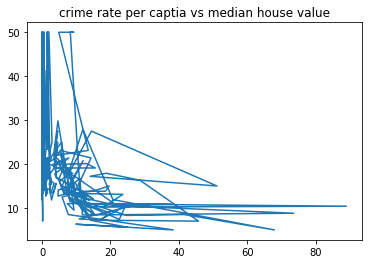

In [0]:
# Time for some EDA.. yea that's right buzz words
plt.plot('CRIM','MDEV',data=boston)
plt.xlabel("crime rate")
plt.ylabel('median value')
plt.title("crime rate per captia vs median house value")
plt.show() 

Ew looks ugly...also doesn't help.

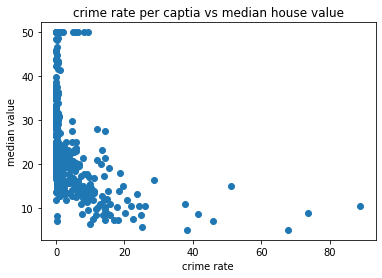

In [0]:
plt.scatter('CRIM','MDEV',data=boston)
plt.xlabel("crime rate")
plt.ylabel('median value')
plt.title("crime rate per captia vs median house value")
plt.show() 

Not much correlation will repeat graphs for rooms, access to highways.

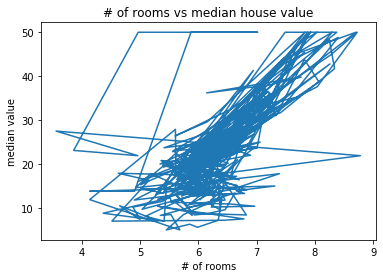

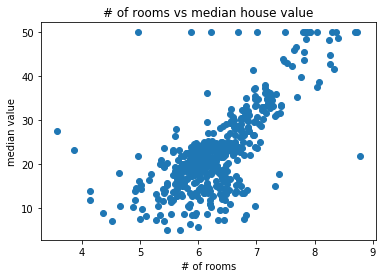

In [0]:
# comparing # of rooms to median house value
plt.plot('RM','MDEV',data=boston)
plt.xlabel("# of rooms")
plt.ylabel('median value')
plt.title("# of rooms vs median house value")
plt.show() 
plt.scatter('RM','MDEV',data=boston)
plt.xlabel("# of rooms")
plt.ylabel('median value')
plt.title("# of rooms vs median house value")
plt.show() 

Appears to be weak positive relationship

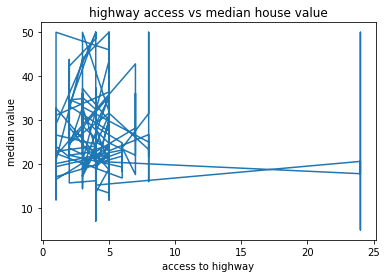

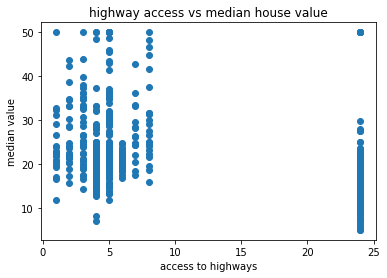

In [0]:
# comparing # of rooms to median house value
plt.plot('RAD','MDEV',data=boston)
plt.xlabel("access to highway")
plt.ylabel('median value')
plt.title("highway access vs median house value")
plt.show() 
plt.scatter('RAD','MDEV',data=boston)
plt.xlabel("access to highways")
plt.ylabel('median value')
plt.title("highway access vs median house value")
plt.show() 

Looks like I will have to look at histograms and barplots COME BACK TO THIS

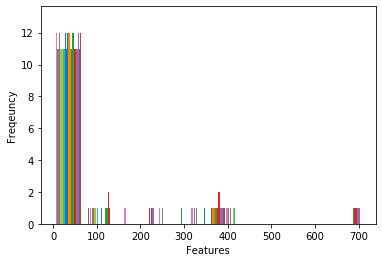

In [0]:
#names = boston.columns
#plt.bar(names,boston,data=boston)
#pd.DataFrame.plot.bar(boston)
#plt.show()
#plt.hist(boston)
#plt.xlabel("Features")
#plt.ylabel("Freqeuncy")
#plt.show()

Just ignore this part didn't work out too well.

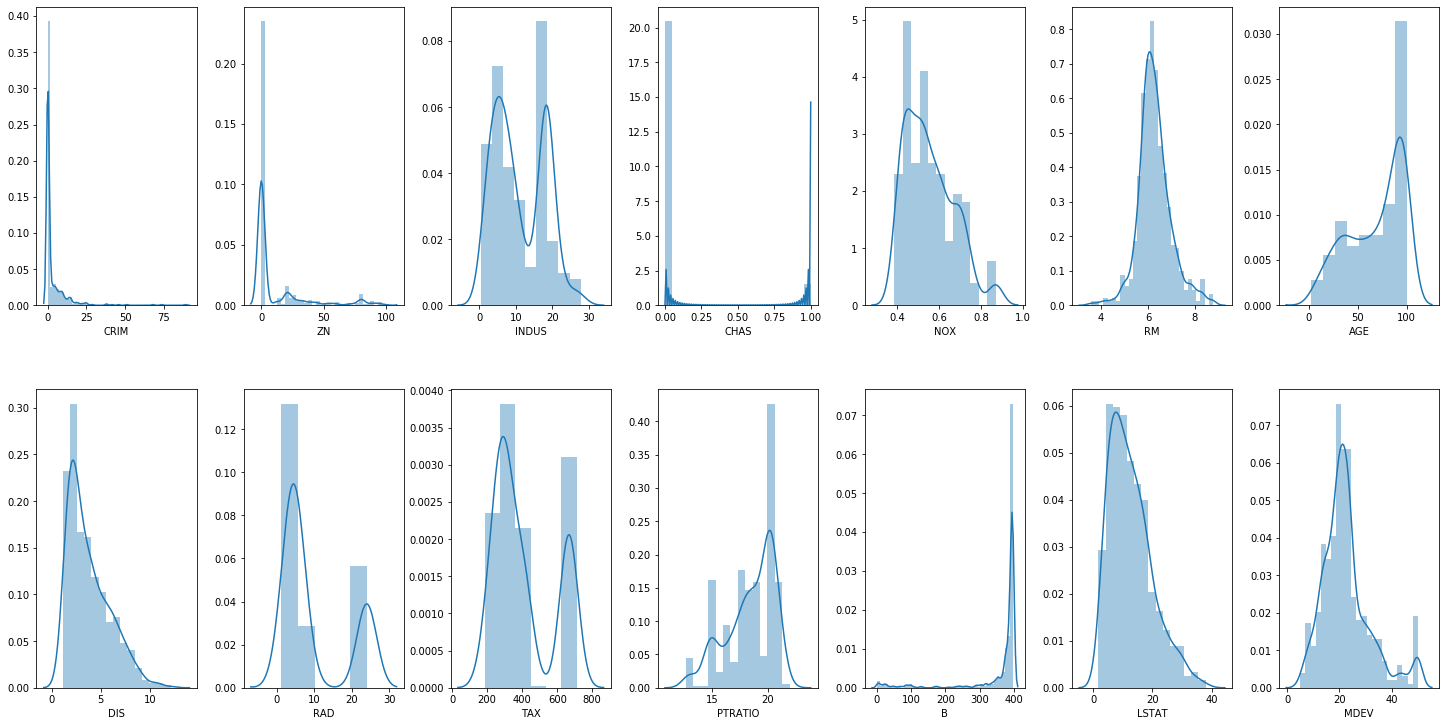

In [0]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

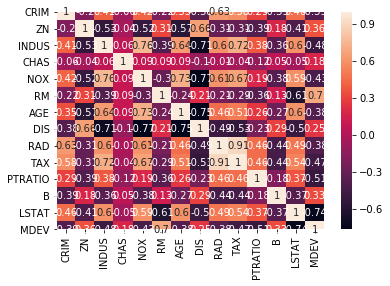

In [0]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Looks quite nice though I suspect there are outliers in the data based on few of these graphs.

In [0]:
dec = DecisionTreeRegressor(random_state=0)
xtrain,xtest,ytrain,ytest = train_test_split(boston,labels, test_size = 0.3) # split 70% train 30% test
dec = dec.fit(xtrain,ytrain)
pred = dec.predict(xtest) # predicting what test set will generate then compare with actual
r2 = dec.score(xtest,ytest)
print(r2)
acc = cross_val_score(dec,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
acc_matrix["Decision Tree"] = acc
# changing max depth parameter
dec = DecisionTreeRegressor(max_depth=5)
#xtrain,xtest,ytrain,ytest = train_test_split(boston,labels, test_size = 0.3) # split 70% train 30% test
dec = dec.fit(xtrain,ytrain)
pred = dec.predict(xtest) # predicting what test set will generate then compare with actual
r2 = dec.score(xtest,ytest)
print(r2)
acc = cross_val_score(dec,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
# changing max depth parameter
dec = DecisionTreeRegressor(max_depth=10)
#xtrain,xtest,ytrain,ytest = train_test_split(boston,labels, test_size = 0.3) # split 70% train 30% test
dec = dec.fit(xtrain,ytrain)
pred = dec.predict(xtest) # predicting what test set will generate then compare with actual
r2 = dec.score(xtest,ytest)
print(r2)
acc = cross_val_score(dec,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
# changing max depth and random state parameter
dec = DecisionTreeRegressor(max_depth=5,random_state=0)
#xtrain,xtest,ytrain,ytest = train_test_split(boston,labels, test_size = 0.3) # split 70% train 30% test
dec = dec.fit(xtrain,ytrain)
pred = dec.predict(xtest) # predicting what test set will generate then compare with actual
r2 = dec.score(xtest,ytest)
print(r2)
acc = cross_val_score(dec,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
# changing max depth and random state parameter
dec = DecisionTreeRegressor(max_depth=10,random_state=0)
#xtrain,xtest,ytrain,ytest = train_test_split(boston,labels, test_size = 0.3) # split 70% train 30% test
dec = dec.fit(xtrain,ytrain)
pred = dec.predict(xtest) # predicting what test set will generate then compare with actual
r2 = dec.score(xtest,ytest)
print(r2)
acc = cross_val_score(dec,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))

0.998844075487832
MSE: -1.03 (+/- 1.55)
0.9967705685595315
MSE: -1.13 (+/- 1.50)
0.9986280057760019
MSE: -1.03 (+/- 1.52)
0.9965322136307861
MSE: -1.07 (+/- 1.53)
0.998844075487832
MSE: -1.03 (+/- 1.55)


In [0]:
tree = RandomForestRegressor() # default is 10 trees in forest
tree = tree.fit(xtrain,ytrain)
pred = tree.predict(xtest)
r2 = tree.score(xtest,ytest)
print(r2)
acc = cross_val_score(tree,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
acc_matrix["Random Forest"] = acc
# changing number of trees paramters
tree = RandomForestRegressor(n_estimators=25) # default is 10 trees in forest
tree = tree.fit(xtrain,ytrain)
pred = tree.predict(xtest)
r2 = tree.score(xtest,ytest)
print(r2)
acc = cross_val_score(tree,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
# changing number of trees paramters
tree = RandomForestRegressor(n_estimators=50) # default is 10 trees in forest
tree = tree.fit(xtrain,ytrain)
pred = tree.predict(xtest)
r2 = tree.score(xtest,ytest)
print(r2)
acc = cross_val_score(tree,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
# changing number of trees paramters
tree = RandomForestRegressor(n_estimators=75) # default is 10 trees in forest
tree = tree.fit(xtrain,ytrain)
pred = tree.predict(xtest)
r2 = tree.score(xtest,ytest)
print(r2)
acc = cross_val_score(tree,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
# changing number of trees paramters
tree = RandomForestRegressor(n_estimators=100) # default is 10 trees in forest
tree = tree.fit(xtrain,ytrain)
pred = tree.predict(xtest)
r2 = tree.score(xtest,ytest)
print(r2)
acc = cross_val_score(tree,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9993789962284378
MSE: -0.99 (+/- 0.76)
0.9997505815774234
MSE: -0.77 (+/- 0.63)
0.9997785975567961
MSE: -0.73 (+/- 0.72)
0.9996397753890899
MSE: -0.41 (+/- 0.30)
0.9996840791482156
MSE: -0.57 (+/- 0.43)


In [0]:
reg = LinearRegression()
reg = reg.fit(xtrain,ytrain)
pred = reg.predict(xtest)
r2 = reg.score(xtest,ytest)
print(r2)
acc = cross_val_score(reg,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
acc_matrix["Regression"] = acc
# changing normailze parameter
reg = LinearRegression(normalize=True)
reg = reg.fit(xtrain,ytrain)
pred = reg.predict(xtest)
r2 = reg.score(xtest,ytest)
print(r2)
acc = cross_val_score(reg,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
# changing which variables to use based on R outout of signifcant variables
temp = ["ZN","NOX","RM","DIS","RAD","PTRATIO","B","LSTAT"]
xtrain = xtrain[temp]
xtest = xtest[temp]
reg = reg.fit(xtrain,ytrain)
pred = reg.predict(xtest)
r2 = reg.score(xtest,ytest)
print(r2)
acc = cross_val_score(reg,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
reg = LinearRegression(normalize=False)
reg = reg.fit(xtrain,ytrain)
pred = reg.predict(xtest)
r2 = reg.score(xtest,ytest)
print(r2)
acc = cross_val_score(reg,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
best_models = {}
best_models["Regression"] = acc

0.6789645792515047
MSE: -22.42 (+/- 23.26)
0.6789645792515038
MSE: -22.42 (+/- 23.26)
0.6789645792515038
MSE: -22.42 (+/- 23.26)
0.6789645792515047
MSE: -22.42 (+/- 23.26)


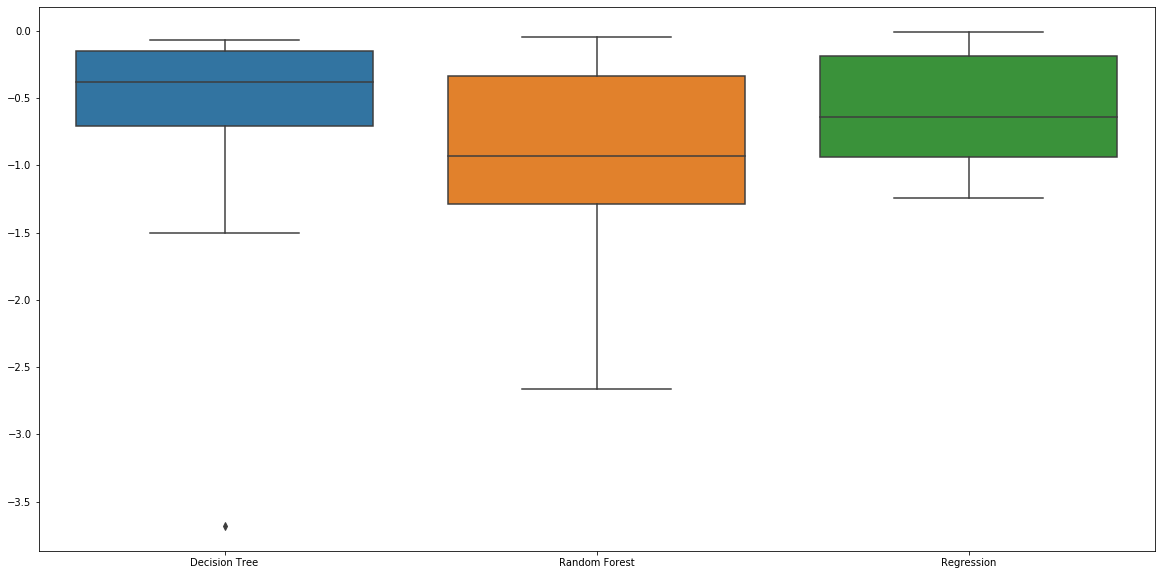

In [0]:
# Final comparisons
plt.figure(figsize=(20, 10))
acc_matrix = pd.DataFrame(acc_matrix)
#acc_matrix.head()
sns.boxplot(data = acc_matrix)

Snapshot of R where it tells you which variables are signifacnt on a linear regression model. The more stars the better
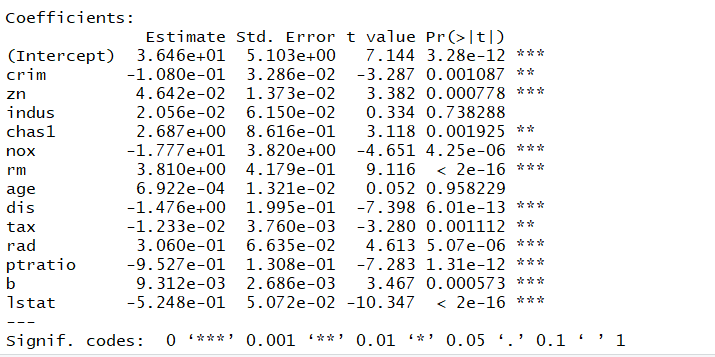

In [0]:
# rerun best models using only 3 * star variables
temp = ["ZN","NOX","RM","DIS","RAD","PTRATIO","B","LSTAT"]
xtrain = xtrain[temp]
xtest = xtest[temp]
dec = DecisionTreeRegressor(random_state=0)
dec = dec.fit(xtrain,ytrain)
pred = dec.predict(xtest) # predicting what test set will generate then compare with actual
r2 = dec.score(xtest,ytest)
print(r2)
acc = cross_val_score(dec,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
best_models["Decision Tree"] = acc


tree = RandomForestRegressor(n_estimators=75) # default is 10 trees in forest
tree = tree.fit(xtrain,ytrain)
pred = tree.predict(xtest)
r2 = tree.score(xtest,ytest)
print(r2)
acc = cross_val_score(tree,xtest,ytest,scoring="neg_mean_squared_error",cv=10)
print("MSE: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std()))
best_models["Random Forest"] = acc

0.6740602930878296
MSE: -33.55 (+/- 43.70)
0.8588477263333205
MSE: -17.59 (+/- 23.83)


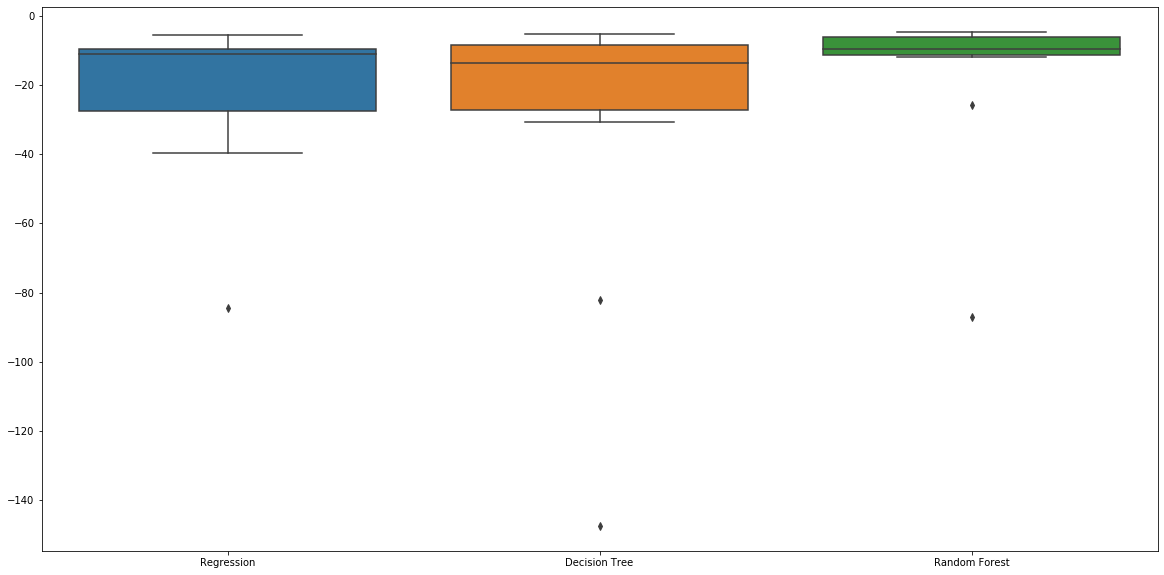

In [0]:
# Final comparisons of "best" models
plt.figure(figsize=(20, 10))
best_models = pd.DataFrame(best_models)
sns.boxplot(data = best_models)